# PREDICTING OBESITY 

Various python-based machine learning and data science tools are utilised in an attempt to predict **If**, **How** and **When** a woman is likely to be obese or not. From the medical records provided, a machine learning model will be built which will be able to predict whether a woman is likely to be obese or not.

### VIA THE FOLLOWING APPROACH:
* Problem definition.
* Data.
* Evaluation.
* Features.
* Modelling.
* Experimentation.

# 1. Problem Definition

 Given the clinical parmeters, Skin thickness, Glucose level, etc. can a prediction be made on whether a woman is prone to obesity or not?

# 2. Data

The data used in training this model came from Kaggle :https://www.kaggle.com/salihacur/diabetes

# 3. Evaluation

From the data provided, will it be possible to predict at least 8%, if a woman will have diabetes or not?

# 4. Features

The data set has a total number of 768 instances in which a woman has diabetes or not and a total number of 8 attributes.

The dictionary below shows the column names and meaning:

1. **Pregnancies** : Number of times pregnant.
2. **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. **Blood Pressure** : Diastolic blood pressure (mm Hg).
4. **SkinThickness** : Triceps skin fold thickness (mm).
5. **Insulin**: 2-Hour serum insulin (mu U/ml).
6. **BMI** : Body mass index (weight in kg/(height in m)^2)
7. **Diabetes pedigree function**: Diabetes pedigree function is a function which scores likelihood of diabetes based on family history.
8. **Age** : Age in years.
9. **Outcome** : Class variable (0 or 1).
    * Class value '1' tested positive for obesity.
    * Class value '0' is void of obesity.
 
Class Value Number of instances
0 : 500
1 : 268




In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.feature_selection import SelectFromModel

In [2]:
df= pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape, df['Outcome'].value_counts()

((768, 9),
 0    500
 1    268
 Name: Outcome, dtype: int64)

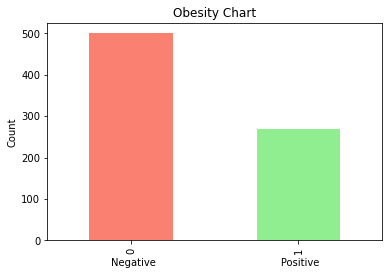

In [6]:
df['Outcome'].value_counts().plot(kind= 'bar', color=['salmon', 'lightgreen'])
plt.title("Obesity Chart")
plt.xlabel("Negative                                        Positive")
plt.ylabel("Count");

## **Obesity and Pregnanciy**

In [7]:
pd.crosstab(df.Outcome,df.Pregnancies)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


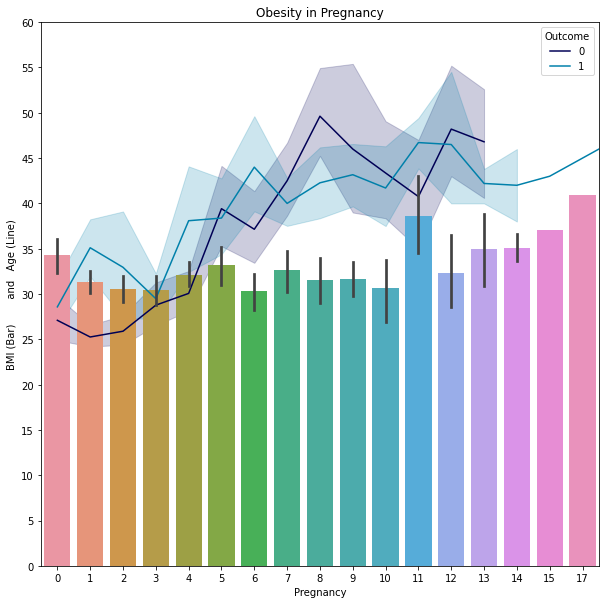

In [8]:
plt.figure(figsize=(10,10))
sns.lineplot(palette='ocean',x='Pregnancies', y= 'Age',hue='Outcome', data=df)
sns.barplot(x='Pregnancies', y= 'BMI', data=df)
plt.title('Obesity in Pregnancy')
plt.xlabel('Pregnancy')
plt.ylim([0,60])
plt.ylabel('BMI (Bar)        and   Age (Line)')
plt.yticks(np.arange(0,65,5));

## Obesity Frequency per Diabetese Pedigree and Glucose Increase.

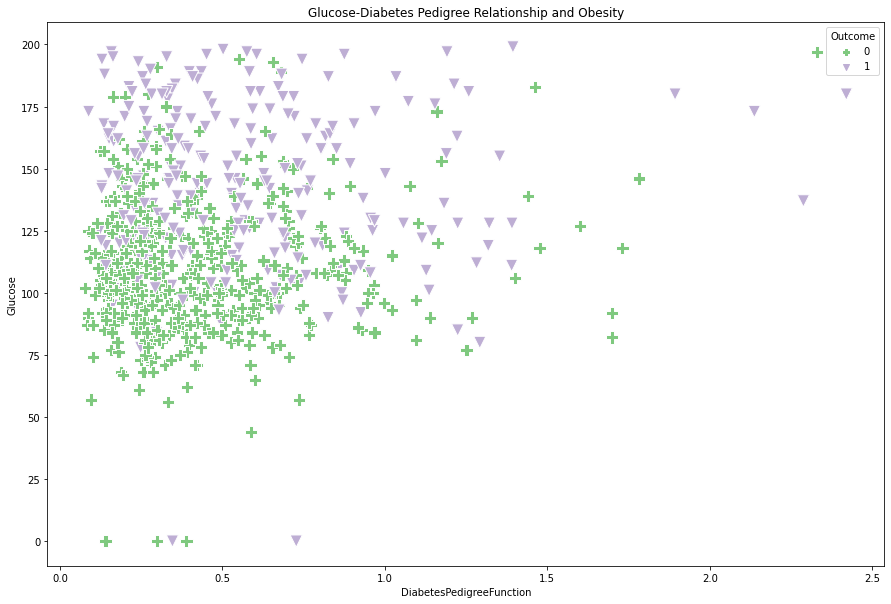

In [9]:
test=pd.crosstab(df.Glucose,df.Outcome)
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.scatterplot(y= df.Glucose,x=df.DiabetesPedigreeFunction, hue=df.Outcome,palette='Accent',style=df.Outcome,markers=['P','v'],s=150)
plt.title('Glucose-Diabetes Pedigree Relationship and Obesity');

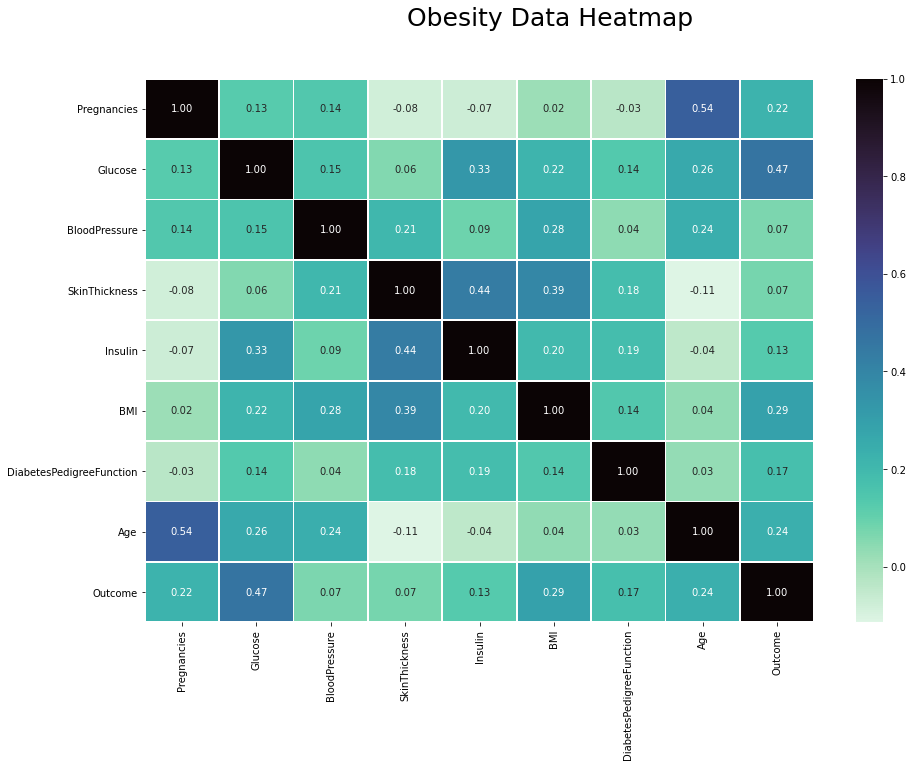

In [10]:
corr_matrix=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,annot=True, fmt='.2f',linewidths= 0.8, cmap='mako_r')
plt.suptitle(t= 'Obesity Data Heatmap', fontsize=25);

# MODELLING

In [38]:
X= df.drop('Outcome', axis=1)
y=df["Outcome"]

In [39]:
np.random.seed(1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)
clf= RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8246753246753247

In [40]:
models= {"ABC": AdaBoostClassifier(),
         "KNN": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier()}


def fit_score(models, X_train,y_train,X_test, y_test):
    """
    Fits a models and scores with test data.
    models: dict of models to be fitted.
    X_train: Training data.
    y_train: Outcome data.
    X_test: Test data.
    y_test: Outcome test.
    """
    np.random.seed(33)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [41]:
model_score = fit_score(models=models,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
model_score

{'ABC': 0.7922077922077922,
 'KNN': 0.7337662337662337,
 'Logistic Regression': 0.7792207792207793,
 'Random Forest': 0.7922077922077922}

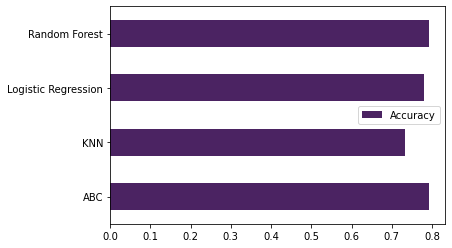

In [42]:
model_check= pd.DataFrame(model_score,index=["Accuracy"])
model_check.T.plot(kind='barh', cmap='flare_r');

In [16]:
rf_grid= {'n_estimators': range(10,100,20),
          'min_samples_split':np.arange(2,10,2),
          'min_samples_leaf':np.arange(1,20,10),
          'max_features': ['sqrt','auto'],
          'max_depth': [None,3,5,10]} 

In [17]:
np.random.seed(55)
rsv_clf= RandomizedSearchCV(estimator=clf,param_distributions=rf_grid,verbose= True, n_jobs=1,cv=5)
rsv_clf.fit(X_train,y_train)
rsv_clf.score(X_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.1s finished


0.7987012987012987

In [18]:
gs_clf= GridSearchCV(estimator=clf,cv=5,param_grid=rf_grid,verbose= True, n_jobs=1)
gs_clf.fit(X_train, y_train)
gs_clf.score(X_test,y_test)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:  2.6min finished


0.8181818181818182

In [19]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 30}

In [20]:
gs_clf.score(X_test,y_test)

0.8181818181818182

In [21]:
y_preds= clf.predict(X_test)

In [22]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        99
           1       0.79      0.69      0.74        55

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



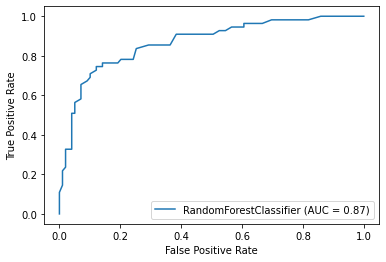

In [23]:
plot_roc_curve(clf, X_test,y_test);

In [24]:
recall=cross_val_score(clf,X,y, scoring='recall', cv=5).mean()
precision=cross_val_score(clf,X,y, scoring='precision',cv=5).mean()
clf_f1_score=cross_val_score(clf,X,y, scoring='f1',cv=5).mean()
accuracy=cross_val_score(clf,X,y, scoring='accuracy',cv=5).mean()


In [43]:
clf_metrics= pd.DataFrame({'Accuracy': accuracy,
                             'Precision': precision,
                             'F1_score': clf_f1_score,
                             'Recall': recall},index=[0])
clf_metrics

,Accuracy,Precision,F1_score,Recall
0,0.768262,0.716461,0.644025,0.58232


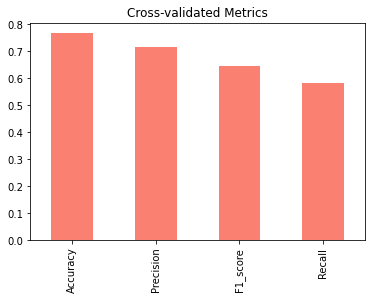

In [32]:
clf_metrics.T.plot(kind='bar', color='salmon',title='Cross-validated Metrics', legend=False);

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
sel= SelectFromModel(RandomForestClassifier())

sel.fit(X_train,y_train);

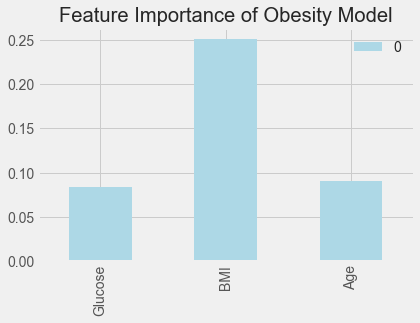

In [133]:
plt.style.use('fivethirtyeight')
features= X_train.columns[(sel.get_support())]
importances= sel.estimator_.feature_importances_
feature_dict= dict(zip(features,list(importances)))
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind= 'bar', title='Feature Importance of Obesity Model',color='lightblue');